# 数据预处理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\Users\lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [9]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 训练模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4381 - acc: 0.8829 - val_loss: 0.2182 - val_acc: 0.9405
Epoch 2/10
 - 2s - loss: 0.1909 - acc: 0.9454 - val_loss: 0.1557 - val_acc: 0.9556
Epoch 3/10
 - 2s - loss: 0.1356 - acc: 0.9616 - val_loss: 0.1261 - val_acc: 0.9647
Epoch 4/10
 - 2s - loss: 0.1028 - acc: 0.9700 - val_loss: 0.1118 - val_acc: 0.9679
Epoch 5/10
 - 2s - loss: 0.0812 - acc: 0.9771 - val_loss: 0.0981 - val_acc: 0.9723
Epoch 6/10
 - 2s - loss: 0.0660 - acc: 0.9818 - val_loss: 0.0941 - val_acc: 0.9723
Epoch 7/10
 - 2s - loss: 0.0545 - acc: 0.9850 - val_loss: 0.0912 - val_acc: 0.9737
Epoch 8/10
 - 2s - loss: 0.0459 - acc: 0.9877 - val_loss: 0.0828 - val_acc: 0.9758
Epoch 9/10
 - 2s - loss: 0.0381 - acc: 0.9903 - val_loss: 0.0824 - val_acc: 0.9757
Epoch 10/10
 - 2s - loss: 0.0316 - acc: 0.9916 - val_loss: 0.0803 - val_acc: 0.9762


# 以图形显示训练过程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
#     print(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

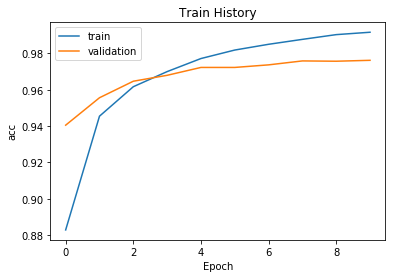

In [14]:
show_train_history(train_history,'acc','val_acc')

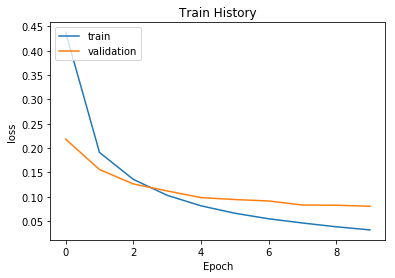

In [15]:
show_train_history(train_history,'loss','val_loss')

# 评估模型的准确率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores)

10000/10000 [==============================] - 0s 38us/step

accuracy= [0.07568380661024712, 0.9762]


# 进行预测

In [17]:
prediction=model.predict_classes(x_Test)

In [18]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

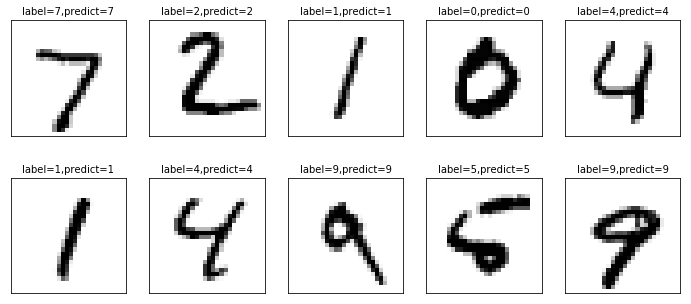

In [20]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [21]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,0,1,0,2,4,9,1
3,0,0,4,993,0,0,0,3,6,4
4,1,0,5,1,962,0,2,0,3,8
5,2,0,0,15,1,855,7,2,7,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,13,6,1,0,0,988,7,8
8,5,0,3,6,1,1,1,2,954,1


In [22]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [23]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


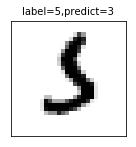

In [24]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

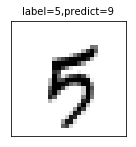

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)